# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Tegar Posma Diaz Simanjuntak]
- **Email:** [m011b4ky4308@bangkit.academy]
- **ID Dicoding:** [Tegar Posma Diaz Simanjuntak]

## Menentukan Pertanyaan Bisnis

-  Bagaimana pengaruh kondisi cuaca dan waktu (hari, bulan, dan jam) terhadap jumlah penyewaan sepeda?
- Apa faktor-faktor yang paling berkontribusi terhadap jumlah penyewa sepeda terdaftar dibandingkan dengan pengguna kasual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/TegarSimanjuntak/Bike_DataSet/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/TegarSimanjuntak/Bike_DataSet/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

Menilai tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:

day_df.duplicated().sum()

0

In [16]:
hour_df.duplicated().sum()

0

In [13]:

day_df.drop_duplicates(inplace=True)

In [17]:
hour_df.drop_duplicates(inplace=True)

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Missing values

In [15]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [20]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


## Exploratory Data Analysis (EDA)

### Explore hour






In [ ]:
hour_df.sample(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9240,9241,2012-01-25,1,1,1,22,0,3,1,1,0.30,0.3182,0.65,0.0896,12,101,113
12845,12846,2012-06-24,3,1,6,10,0,0,0,1,0.76,0.6818,0.40,0.0000,161,291,452
9218,9219,2012-01-25,1,1,1,0,0,3,1,1,0.26,0.3030,0.93,0.0000,6,25,31
15099,15100,2012-09-26,4,1,9,8,0,3,1,1,0.56,0.5303,0.73,0.2985,30,808,838
14164,14165,2012-08-18,3,1,8,9,0,6,0,1,0.66,0.6212,0.65,0.2836,81,211,292


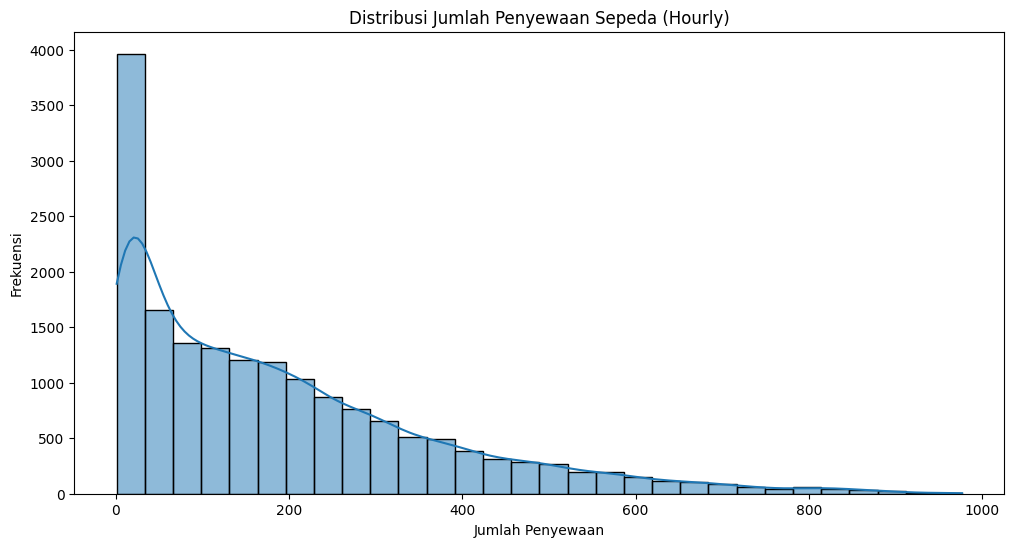

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (Hourly)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


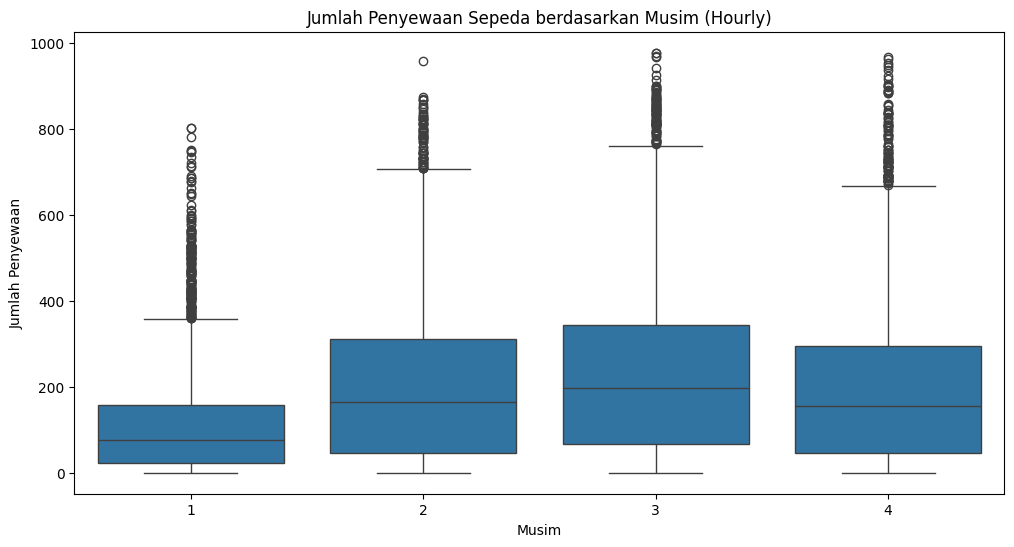

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim (Hourly)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

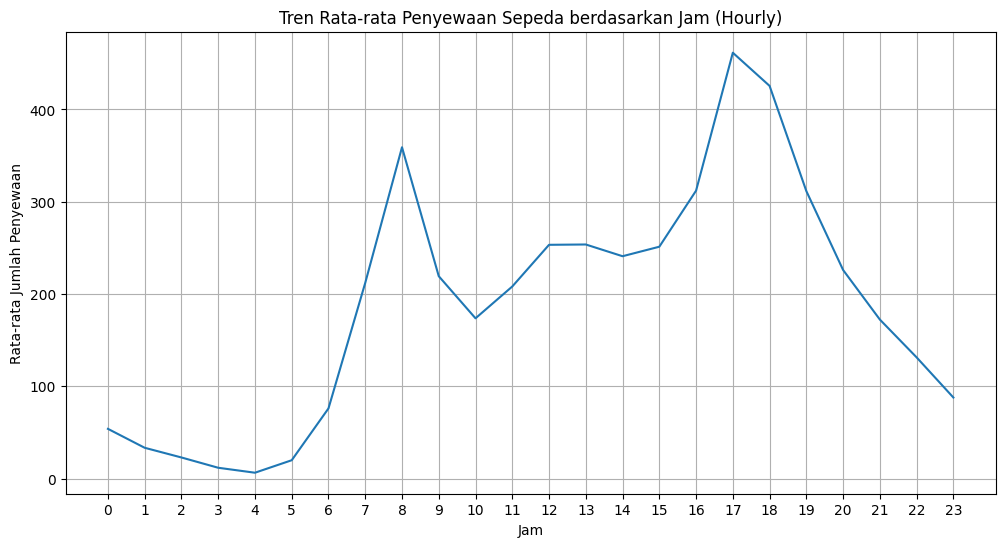

In [ ]:
plt.figure(figsize=(12, 6))
hour_df.groupby('hr')['cnt'].mean().plot()
plt.title('Tren Rata-rata Penyewaan Sepeda berdasarkan Jam (Hourly)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan jam dari 0 hingga 23
plt.grid()
plt.show()

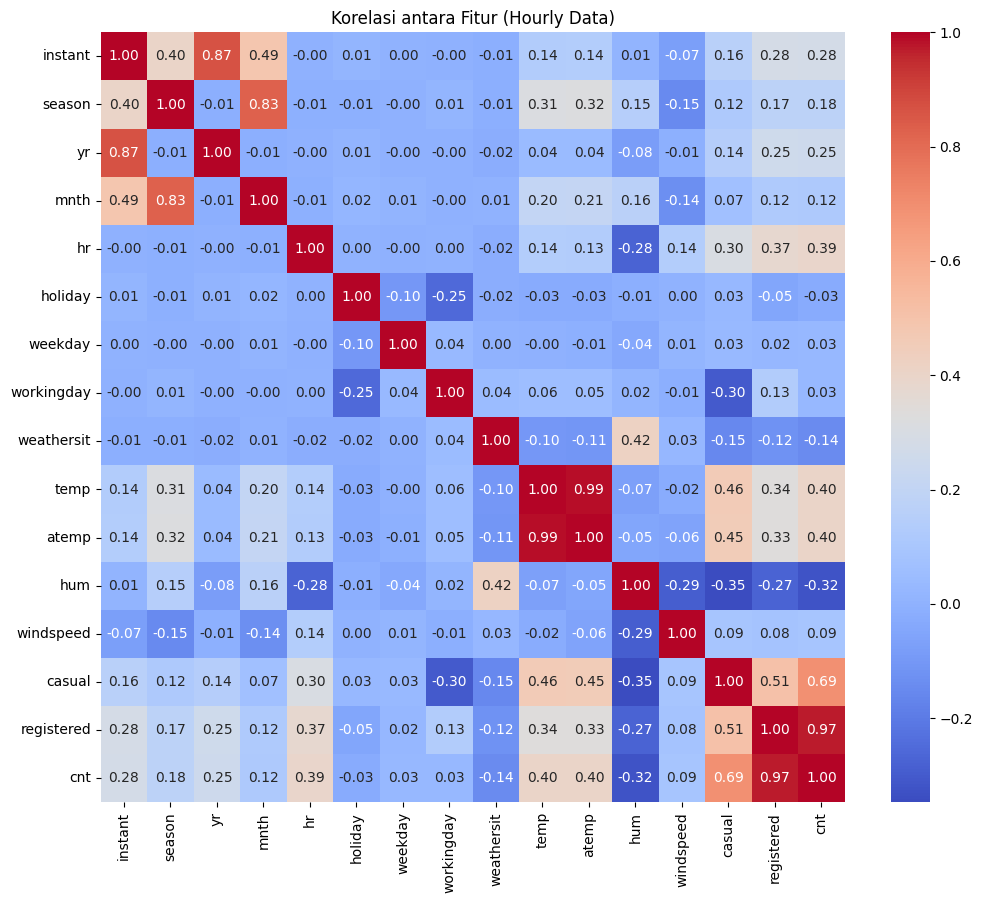

In [ ]:
hour_df_numeric = hour_df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
correlation_hour = hour_df_numeric.corr()  # Hanya menghitung korelasi pada kolom numerik
sns.heatmap(correlation_hour, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antara Fitur (Hourly Data)')
plt.show()

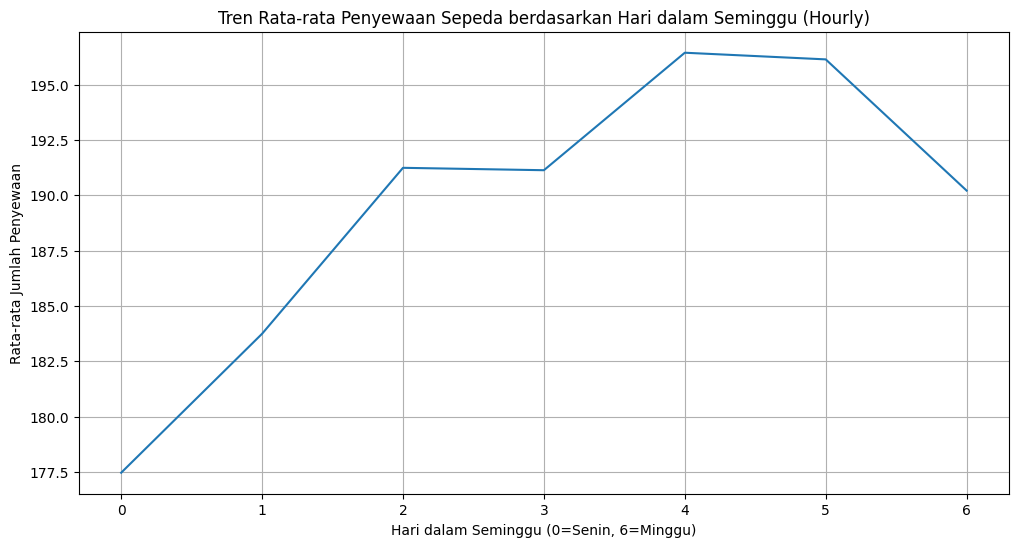

In [ ]:
plt.figure(figsize=(12, 6))
hour_df.groupby('weekday')['cnt'].mean().plot()
plt.title('Tren Rata-rata Penyewaan Sepeda berdasarkan Hari dalam Seminggu (Hourly)')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 7))  # Menampilkan hari dari 0 hingga 6
plt.grid()
plt.show()

### Explore Day


In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
294,295,2011-10-22,4,0,10,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499,2809,4308
615,616,2012-09-07,3,1,9,0,5,1,1,0.703333,0.657204,0.736250,0.171646,1045,6459,7504
348,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,181,3528,3709
438,439,2012-03-14,1,1,3,0,3,1,1,0.572500,0.548617,0.507083,0.115062,997,5315,6312
486,487,2012-05-01,2,1,5,0,2,1,2,0.613333,0.577021,0.659583,0.156096,653,5087,5740


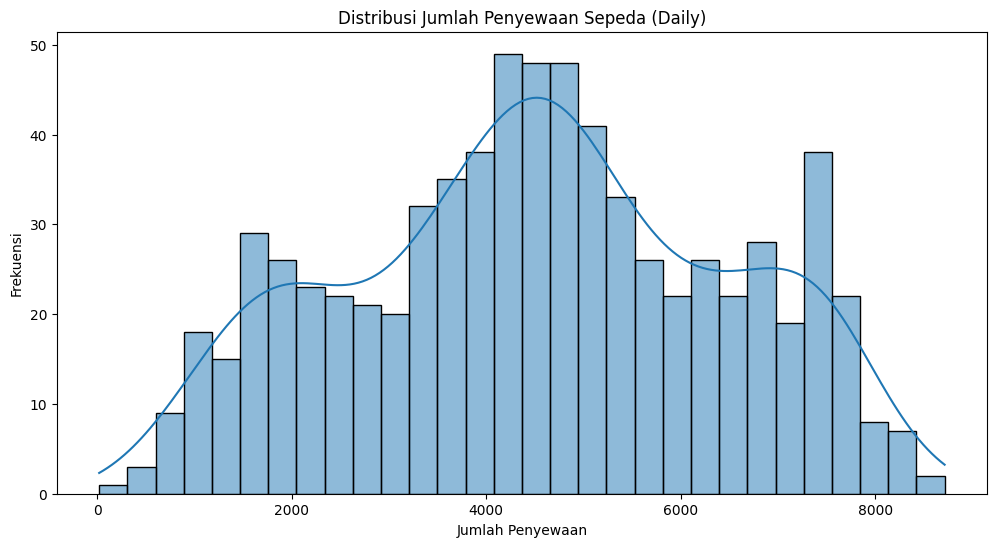

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (Daily)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


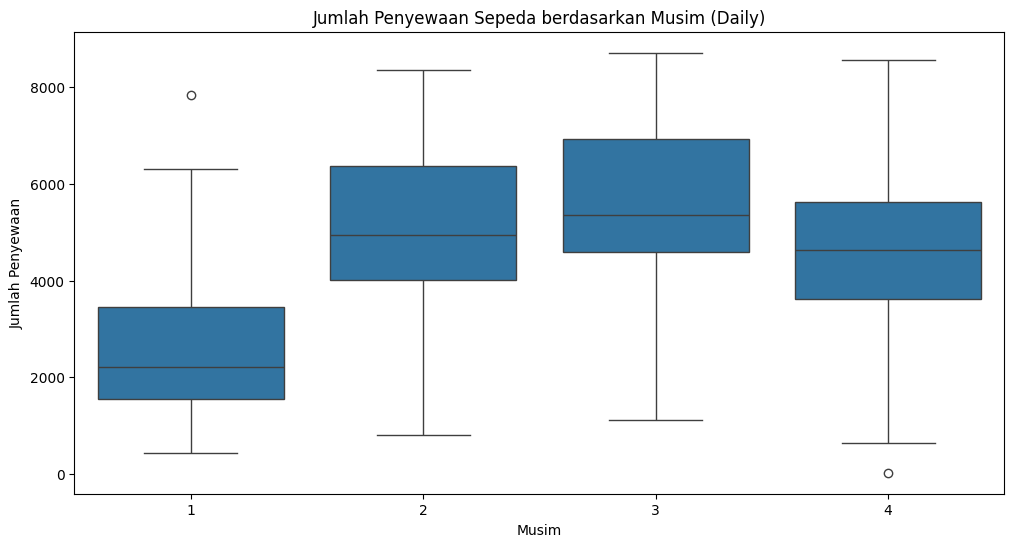

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim (Daily)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

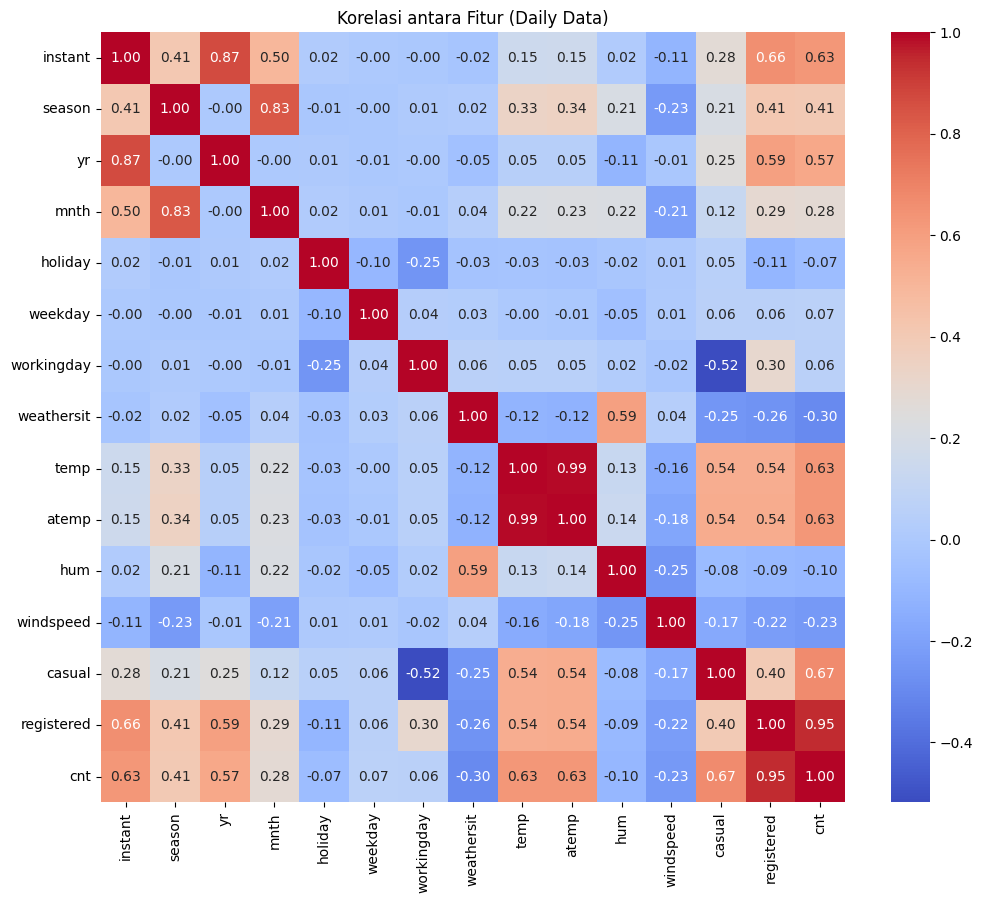

In [ ]:
day_df_numeric = day_df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
correlation_day = day_df_numeric.corr()  # Hanya menghitung korelasi pada kolom numerik
sns.heatmap(correlation_day, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antara Fitur (Daily Data)')
plt.show()

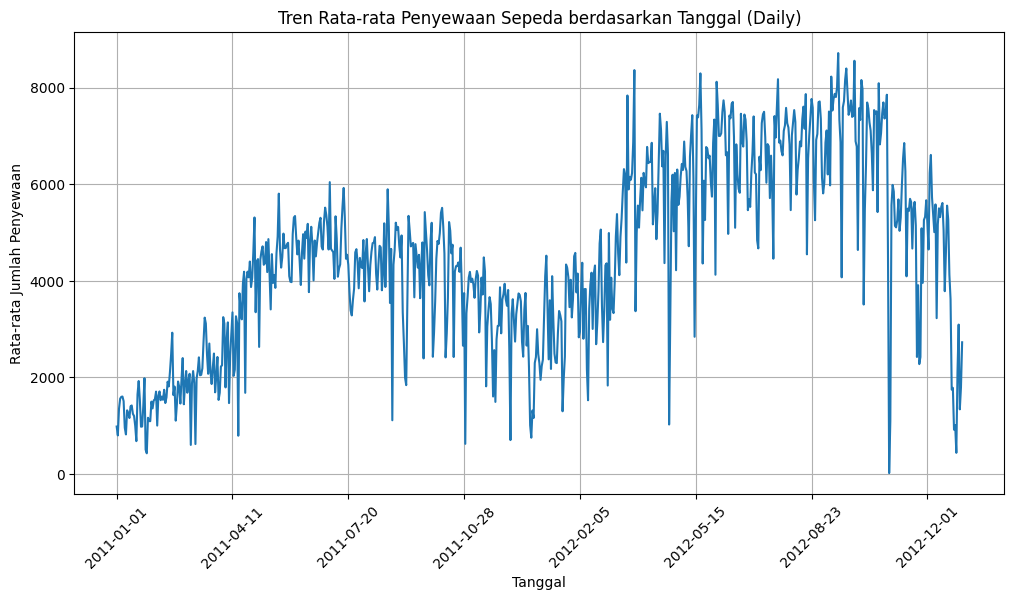

In [ ]:
plt.figure(figsize=(12, 6))
day_df.groupby('dteday')['cnt'].mean().plot()
plt.title('Tren Rata-rata Penyewaan Sepeda berdasarkan Tanggal (Daily)')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Cek kondisi cuaca yang ada dalam data
unique_weather_hour = hour_df['weathersit'].unique()
unique_weather_day = day_df['weathersit'].unique()

print("Kondisi cuaca unik (hour_df):", unique_weather_hour)
print("Kondisi cuaca unik (day_df):", unique_weather_day)

Kondisi cuaca unik (hour_df): [1 2 3 4]
Kondisi cuaca unik (day_df): [2 1 3]


<ipython-input-59-735c644b0a28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_hour = sns.barplot(x=weather_rentals_hour.index, y=weather_rentals_hour.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

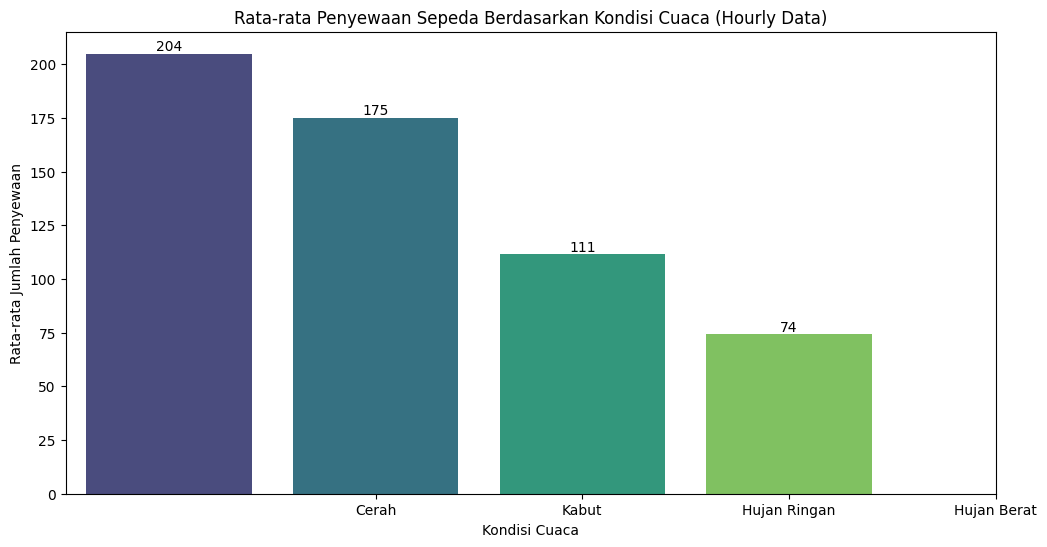

In [ ]:
# Rata-rata penyewaan berdasarkan kondisi cuaca (hourly)
weather_rentals_hour = hour_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(12, 6))
bar_plot_hour = sns.barplot(x=weather_rentals_hour.index, y=weather_rentals_hour.values, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Hourly Data)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')

# Menambahkan angka di atas setiap batang
for p in bar_plot_hour.patches:
    bar_plot_hour.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=weather_rentals_hour.index, labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'][:len(weather_rentals_hour)])
plt.show()

<ipython-input-60-a90aebe190f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_day = sns.barplot(x=weather_rentals_day.index, y=weather_rentals_day.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: F

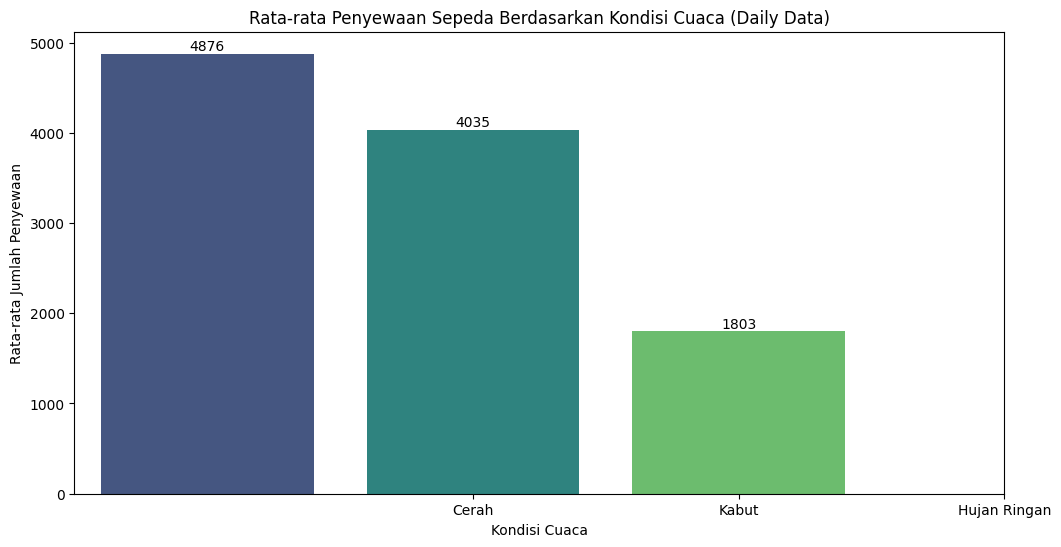

In [ ]:
weather_rentals_day = day_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(12, 6))
bar_plot_day = sns.barplot(x=weather_rentals_day.index, y=weather_rentals_day.values, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Daily Data)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')

# Menambahkan angka di atas setiap batang
for p in bar_plot_day.patches:
    bar_plot_day.annotate(f'{int(p.get_height())}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=weather_rentals_day.index, labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'][:len(weather_rentals_day)])
plt.show()

### Pertanyaan 2:

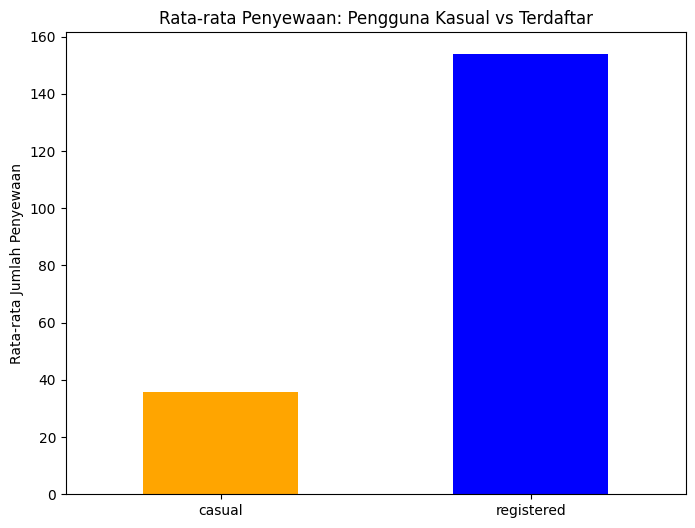

In [ ]:
registered_vs_casual = hour_df[['casual', 'registered']].mean()

plt.figure(figsize=(8, 6))
registered_vs_casual.plot(kind='bar', color=['orange', 'blue'])
plt.title('Rata-rata Penyewaan: Pengguna Kasual vs Terdaftar')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.show()


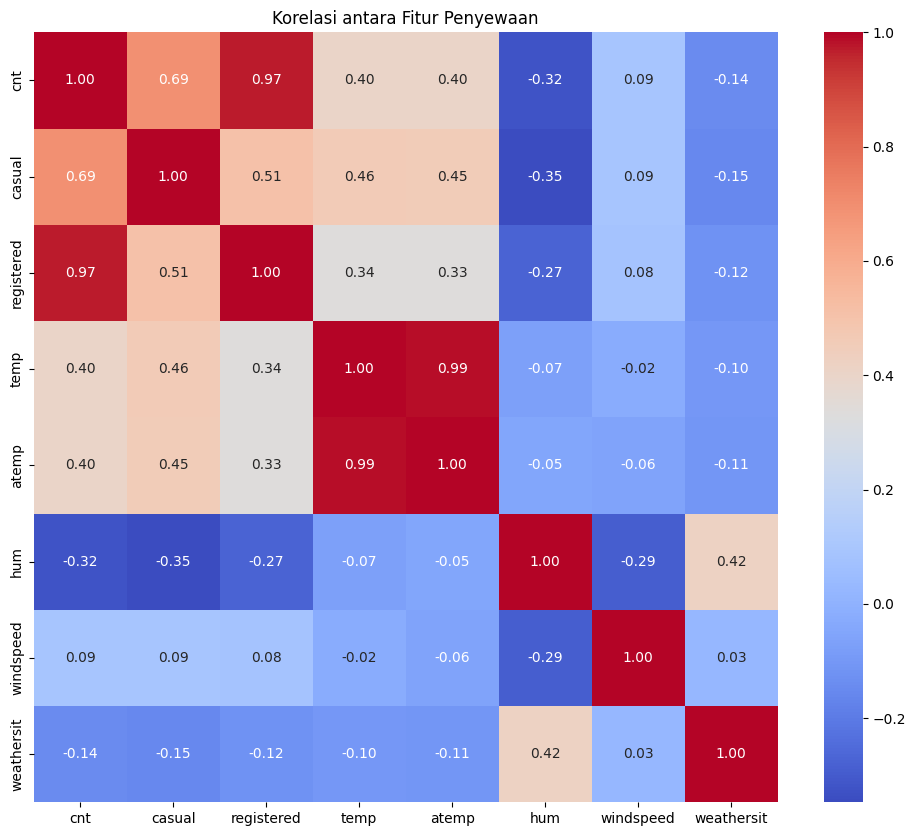

In [ ]:

# Korelasi antara fitur untuk memahami kontribusi
plt.figure(figsize=(12, 10))
correlation_rentals = hour_df[['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit']].corr()
sns.heatmap(correlation_rentals, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antara Fitur Penyewaan')
plt.show()

**Insight:**
- Perbandingan Penyewa Kasual dan Terdaftar:

Histogram menunjukkan bahwa rata-rata jumlah penyewaan sepeda untuk penyewa terdaftar jauh lebih tinggi dibandingkan dengan penyewa kasual. Penyewa terdaftar memiliki rata-rata lebih dari 140 penyewaan, sementara penyewa kasual hanya sekitar 40 penyewaan. Ini mengindikasikan bahwa penyewa terdaftar cenderung menggunakan layanan penyewaan sepeda lebih sering daripada penyewa kasual.
Potensi untuk Meningkatkan Penyewa Kasual:

Mengingat bahwa penyewa kasual memiliki jumlah yang jauh lebih rendah, terdapat peluang untuk meningkatkan jumlah penyewa kasual melalui strategi pemasaran yang tepat, promosi, atau program loyalitas yang menarik. Mungkin perlu dilakukan riset lebih lanjut untuk memahami kebutuhan dan preferensi penyewa kasual.
- Insight dari Heatmap Korelasi
Korelasi Tinggi Antara Penyewa Terdaftar dan Total Penyewaan:

Korelasi antara jumlah penyewa terdaftar (registered) dan jumlah total penyewaan (cnt) sangat tinggi, yaitu 0.97. Ini menunjukkan bahwa penyewa terdaftar memiliki pengaruh yang signifikan terhadap jumlah total penyewaan sepeda. Jika jumlah penyewa terdaftar meningkat, jumlah penyewaan secara keseluruhan juga cenderung meningkat.
Dampak Suhu:

Variabel suhu (temp dan atemp) juga menunjukkan korelasi positif dengan jumlah penyewaan, dengan nilai 0.40. Ini menunjukkan bahwa suhu yang lebih tinggi mungkin mendorong lebih banyak orang untuk menyewa sepeda.
Korelasi Negatif dengan Kelembaban:

Kelembaban (hum) memiliki korelasi negatif dengan jumlah penyewaan sebesar -0.32. Ini menunjukkan bahwa saat kelembaban meningkat, jumlah penyewaan cenderung menurun. Hal ini mungkin karena kelembaban tinggi dapat membuat kondisi tidak nyaman untuk bersepeda.
Pengaruh Cuaca:

Variabel cuaca (weathersit) memiliki korelasi yang bervariasi dengan jumlah penyewaan, dengan beberapa kondisi cuaca cenderung mengurangi penyewaan sepeda. Ini dapat menjadi faktor penting dalam strategi promosi atau pengelolaan armada sepeda.

Kesimpulan
Dari analisis ini, kita dapat menyimpulkan bahwa suhu dan status penyewa (terdaftar vs. kasual) adalah faktor-faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda. Memperhatikan kondisi cuaca dan menciptakan strategi pemasaran yang ditargetkan untuk penyewa kasual dapat membantu meningkatkan jumlah penyewaan sepeda secara keseluruhan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kondisi cuaca dan waktu sangat memengaruhi seberapa banyak orang menyewa sepeda. Saat cuaca cerah dan hangat, penyewaan sepeda pasti meningkat, sedangkan saat hujan atau cuaca buruk, minat orang untuk bersepeda cenderung menurun. Selain itu, akhir pekan dan bulan-bulan musim panas jadi waktu yang paling ramai untuk penyewaan sepeda. Jadi, kalau kamu mengelola penyewaan sepeda, penting banget untuk memantau cuaca dan merencanakan promosi di waktu-waktu yang tepat agar penyewaanmu tetap laris.

- Conclution pertanyaan 2
Kalau kita lihat perbandingan antara pengguna terdaftar dan kasual, jelas banget bahwa pengguna terdaftar jauh lebih sering menyewa sepeda. Ini menunjukkan bahwa mereka lebih loyal dan terbiasa menggunakan layanan tersebut. Nah, buat menarik pengguna kasual agar mau menjadi terdaftar, penting untuk bikin penawaran yang menarik, seperti diskon atau program loyalitas. Dengan cara ini, kamu bisa meningkatkan jumlah penyewa dan bikin mereka lebih sering bersepeda!